In [1]:
"""
Description:
 This program classifies a person as having a cardiovascular disease (1) or not (0)
 So the target class "cardio" equals 1, when the patient has cardiovascular desease, and it's 0, 
 when the patient is healthy.

 The term "heart disease" is often used interchangeably with the term 
 "cardiovascular disease." Cardiovascular disease generally refers to 
 conditions that involve narrowed or blocked blood vessels that can lead 
 to a heart attack, chest pain (angina) or stroke. Other heart conditions, 
 such as those that affect your heart's muscle, valves or rhythm, also 
 are considered forms of heart disease.

 Diseases under the heart disease umbrella include blood vessel diseases, 
 such as coronary artery disease; heart rhythm problems (arrhythmias); 
 and heart defects you're born with (congenital heart defects), among others.

 Many forms of heart disease can be prevented or treated with healthy lifestyle choices.
 
-https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118


Resources:
 Data=> https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/metadata

Data description
There are 3 types of input features:

1.Objective: factual information;
2.Examination: results of medical examination;
3.Subjective: information given by the patient.

Data Set Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

"""

'\nDescription:\n This program predicts/detects/classifies a person as having a cardiovascular disease (1) or not (0)\n The target class "cardio" equals 1, when the patient has cardiovascular desease, and it\'s 0, \n when the patient is healthy.\n\nResources:\n Data=> https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/metadata\n\nData description\nThere are 3 types of input features:\n\n1.Objective: factual information;\n2.Examination: results of medical examination;\n3.Subjective: information given by the patient.\n\nData Features:\n\nAge | Objective Feature | age | int (days)\nHeight | Objective Feature | height | int (cm) |\nWeight | Objective Feature | weight | float (kg) |\nGender | Objective Feature | gender | categorical code |\nSystolic blood pressure | Examination Feature | ap_hi | int |\nDiastolic blood pressure | Examination Feature | ap_lo | int |\nCholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |\nGlucose | Ex

In [0]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Load the data 
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab 


Saving cardio.csv to cardio.csv


In [3]:
#Store the data into the df variable
df = pd.read_csv('cardio.csv') 
df.head(7) #Print the first 7 rows

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0


In [4]:
#Get the shape of the data (the number of rows & columns)
df.shape

(70000, 13)

In [5]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
#Another check for any null / missing values
df.isnull().values.any()

False

In [7]:
#View some basic statistical details like percentile, mean, standard deviation etc.
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Get a count of the number of patients with (1) and without (0) a cardiovasculer disease 
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

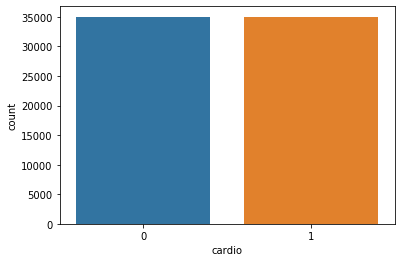

In [44]:
#Visualize this count 
sns.countplot(df['cardio'])

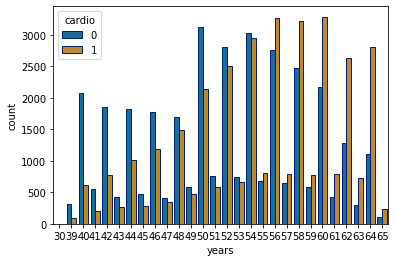

In [10]:
# Let's look at  the number of people with a Cardio Vascular Disease that exceed 
#the number of people without a Cardio Vascular Disease?

#Create a years column
df['years'] = ( df['age'] / 365).round(0)   #Get the years by dividing the age in days by 365
df["years"] = pd.to_numeric(df["years"],downcast='integer') # Convert years to an integer

#Visualize the data
#colorblind palette for colorblindness
sns.countplot(x='years', hue='cardio', data = df, palette="colorblind", edgecolor=sns.color_palette("dark", n_colors = 1));


In [11]:
#Get the correlation of the columns
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


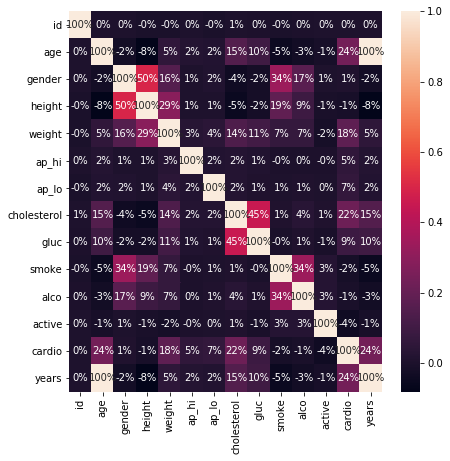

In [12]:
#Visualize the correlation
import matplotlib.pyplot as plt 
plt.figure(figsize=(7,7))  #7in by 7in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [0]:
#Remove / drop the years column
df = df.drop('years', axis=1)

In [0]:
#splitting the data set into a feature data set also known as the independent data set (X), 
# and a target data set also known as the dependent data set (Y).
X = df.iloc[:, :-1].values # Get all of the columns except the last 
Y = df.iloc[:, -1].values  # Get only the last column

In [0]:
#Split the data again, but this time into 75% training and 25% testing data sets.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [0]:
#Feature Scaling
#Scale the data to be values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [42]:
#Test the models accuracy on the training data
model = forest
model.score(X_train, Y_train)

0.9816

In [43]:
#Test the models accuracy on the test data set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Test Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))

[[6604 2005]
 [3128 5763]]
Model Test Accuracy = "0.7066857142857143!"
